## TODO:

- Implement dummy drift detection (EDDM,DDM,PGT,ADWIN)
- Understand their usage and contexts. (e.g gradual vs abrupt)
- Update model upon detection
- Incorporate synthetic data generators (SEA, ETC)

In [1]:
import numpy as np
from skmultiflow.drift_detection.adwin import ADWIN
from skmultiflow.drift_detection import DDM
from skmultiflow.drift_detection import EDDM
from skmultiflow.drift_detection import PageHinkley
import copy 

adwin = ADWIN()
ddm = DDM()
eddm = EDDM()
page_hinkley = PageHinkley()

# Simulating a data stream as a normal distribution of 1's and 0's
data_stream = np.random.randint(2, size=2000)
# Changing the data concept from index 999 to 2000
actual_drift_start = 999
for i in range(actual_drift_start, 2000):
    data_stream[i] = np.random.randint(4, high=8)
#       data_stream[i] = 0
# Adding stream elements to ADWIN and verifying if drift occurred
detect_occur = {'eddm':[],'ddm':[],'page_hinkley':[],'adwin':[]}

for i in range(2000):
    adwin.add_element(data_stream[i])
    eddm.add_element(data_stream[i])
    page_hinkley.add_element(data_stream[i])
    ddm.add_element(data_stream[i])
    if adwin.detected_change():
        detect_occur['adwin'].append(i)
        print('ADWIN Change detected in data: ' + str(data_stream[i]) + ' - at index: ' + str(i))
    if ddm.detected_change():
        detect_occur['ddm'].append(i)
        print('DDM Change detected in data: ' + str(data_stream[i]) + ' - at index: ' + str(i))
    if eddm.detected_change():
        detect_occur['eddm'].append(i)
        print('EDDM Change detected in data: ' + str(data_stream[i]) + ' - at index: ' + str(i))
    if page_hinkley.detected_change():
        detect_occur['page_hinkley'].append(i)
        print('PAGE-H Change detected in data: ' + str(data_stream[i]) + ' - at index: ' + str(i))
#     else:
#         drift_occurrence.append(i,0)
actual_drift = 999
performances= copy.deepcopy(detect_occur)
for key in performances.keys():
    performances[key] = np.array(detect_occur[key])-actual_drift
print(performances)

DDM Change detected in data: 4 - at index: 1004
PAGE-H Change detected in data: 6 - at index: 1008
ADWIN Change detected in data: 4 - at index: 1023
ADWIN Change detected in data: 4 - at index: 1055
ADWIN Change detected in data: 5 - at index: 1087
{'eddm': array([], dtype=float64), 'ddm': array([5]), 'page_hinkley': array([9]), 'adwin': array([24, 56, 88])}


C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\skmultiflow\drift_detection\ddm.py:126: RuntimeWarning: invalid value encountered in sqrt
  self.miss_std = np.sqrt(self.miss_prob * (1 - self.miss_prob) / float(self.sample_count))


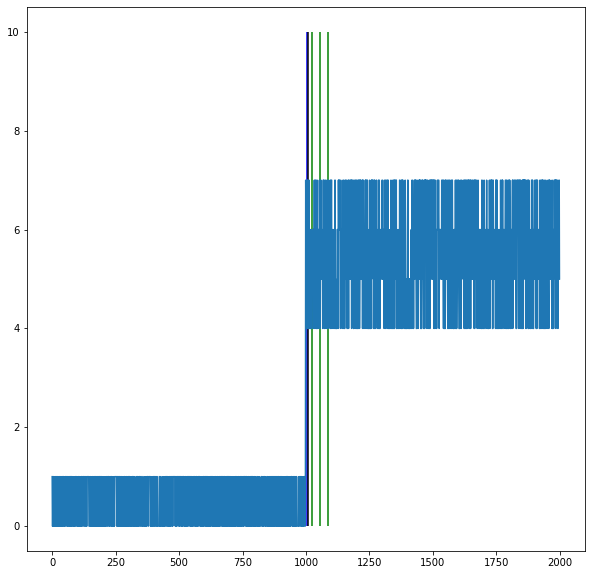

In [2]:
import matplotlib.pyplot as plt
colors ={'eddm':'r','ddm':'b','adwin':'g','page_hinkley':'black'}
plt.figure(figsize=(10,10))
plt.plot(np.arange(len(data_stream)),data_stream)
for algo in list(detect_occur.keys()):
    plt.vlines(detect_occur[algo],ymax=10,ymin=0,color=colors[algo])
